In [1]:
import numpy as np
import pandas as pd
import sklearn

In [32]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [128]:
df_train = pd.read_csv('train.csv')


In [16]:
df=pd.DataFrame(df_train)
df

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
5,2,NaN,3,266,0,2,5,6,0,2,...,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
6,2,BULAT,12,264,264,1,1,0,0,2,...,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8,2,NaN,2,265,0,2,6,0,0,2,...,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1
9,2,Kitty,12,265,0,2,1,7,0,2,...,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4


In [29]:
print(df.describe())

               Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086    

In [31]:
df.corr()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,-0.136061,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337


In [93]:
ADS_Type=df.groupby(["AdoptionSpeed","Type" ]).size()
ADS_Type

AdoptionSpeed  Type
0              1        170
               2        240
1              1       1435
               2       1655
2              1       2164
               2       1873
3              1       1949
               2       1310
4              1       2414
               2       1783
dtype: int64

In [95]:
ADS_Age=df.groupby(["Age","AdoptionSpeed" ]).size()
ADS_Age

Age  AdoptionSpeed
0    0                  10
     1                  50
     2                  44
     3                  39
     4                  36
1    0                  54
     1                 643
     2                 754
     3                 511
     4                 342
2    0                 115
     1                 865
     2                1120
     3                 783
     4                 620
3    0                  44
     1                 408
     2                 586
     3                 458
     4                 470
4    0                  24
     1                 211
     2                 265
     3                 260
     4                 349
5    0                   7
     1                 100
     2                 157
     3                 135
     4                 196
                      ... 
108  2                   3
     3                   4
     4                  11
112  0                   1
     2                   1
117  1   

In [96]:
ADS_Gender=df.groupby(["AdoptionSpeed","Gender" ]).size()
ADS_Gender

AdoptionSpeed  Gender
0              1          160
               2          204
               3           46
1              1         1283
               2         1366
               3          441
2              1         1578
               2         1911
               3          548
3              1         1109
               2         1671
               3          479
4              1         1406
               2         2125
               3          666
dtype: int64

In [97]:
ADS_MatureSize=df.groupby(["AdoptionSpeed","MaturitySize" ]).size()
ADS_MatureSize

AdoptionSpeed  MaturitySize
0              1                139
               2                226
               3                 43
               4                  2
1              1                870
               2               1909
               3                304
               4                  7
2              1                884
               2               2837
               3                305
               4                 11
3              1                641
               2               2360
               3                248
               4                 10
4              1                861
               2               2973
               3                360
               4                  3
dtype: int64

In [98]:
ADS_FurLength=df.groupby(["AdoptionSpeed","FurLength" ]).size()
ADS_FurLength

AdoptionSpeed  FurLength
0              1             194
               2             160
               3              56
1              1            1649
               2            1187
               3             254
2              1            2372
               2            1444
               3             221
3              1            1994
               2            1111
               3             154
4              1            2599
               2            1459
               3             139
dtype: int64

In [99]:
ADS_Vaccinated=df.groupby(["AdoptionSpeed","Vaccinated" ]).size()
ADS_Vaccinated

AdoptionSpeed  Vaccinated
0              1              146
               2              206
               3               58
1              1              965
               2             1777
               3              348
2              1             1473
               2             2112
               3              452
3              1             1419
               2             1459
               3              381
4              1             1895
               2             1673
               3              629
dtype: int64

In [100]:
ADS_Dewormed=df.groupby(["AdoptionSpeed","Dewormed" ]).size()
ADS_Dewormed

AdoptionSpeed  Dewormed
0              1            205
               2            146
               3             59
1              1           1572
               2           1188
               3            330
2              1           2273
               2           1347
               3            417
3              1           1988
               2            914
               3            357
4              1           2359
               2           1220
               3            618
dtype: int64

In [101]:
ADS_Sterilized=df.groupby(["AdoptionSpeed","Sterilized" ]).size()
ADS_Sterilized

AdoptionSpeed  Sterilized
0              1               70
               2              270
               3               70
1              1              364
               2             2378
               3              348
2              1              656
               2             3022
               3              359
3              1              720
               2             2251
               3              288
4              1             1291
               2             2156
               3              750
dtype: int64

In [102]:
ADS_Health=df.groupby(["AdoptionSpeed","Health" ]).size()
ADS_Health

AdoptionSpeed  Health
0              1          392
               2           17
               3            1
1              1         2999
               2           89
               3            2
2              1         3925
               2          106
               3            6
3              1         3150
               2           98
               3           11
4              1         4012
               2          171
               3           14
dtype: int64

In [103]:
ADS_State=df.groupby(["AdoptionSpeed","State" ]).size()
ADS_State

AdoptionSpeed  State
0              41324       4
               41325       3
               41326     246
               41327       8
               41330       3
               41332       4
               41335       3
               41336      23
               41342       1
               41345       1
               41367       2
               41401     112
1              41324      18
               41325      14
               41326    1877
               41327     122
               41330      48
               41332      36
               41335      29
               41336     113
               41342       1
               41345       6
               41361       9
               41367       3
               41401     814
2              41324      23
               41325      34
               41326    2435
               41327     216
               41330     111
                        ... 
               41401     996
               41415       1
3              41324  

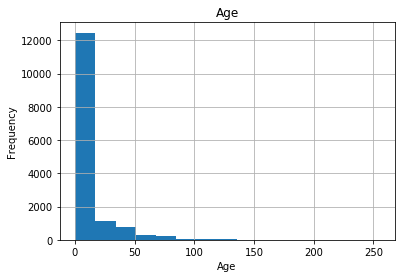

In [121]:
df.hist(column='Age', bins=15)
plt.xlabel("Age")
plt.ylabel("Frequency")

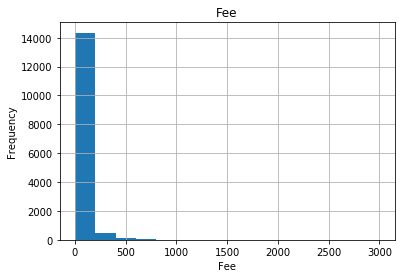

In [122]:
df.hist(column='Fee', bins='auto')

plt.xlabel("Fee")
plt.ylabel("Frequency")

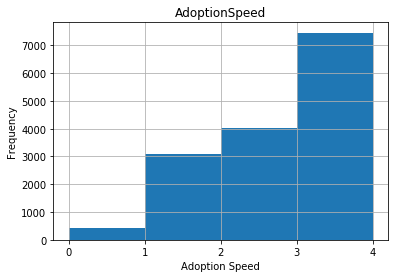

In [123]:
df.hist(column='AdoptionSpeed', bins=4)
plt.xticks(range(0, 5))
plt.xlabel("Adoption Speed")
plt.ylabel("Frequency")


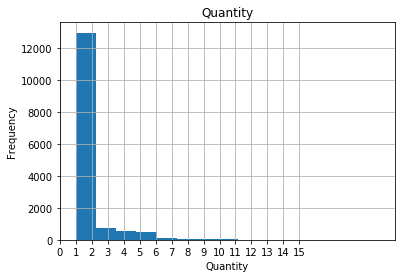

In [124]:
df.hist(column='Quantity', bins=15)
plt.xticks(range(0, 16))
plt.xlabel("Quantity")
plt.ylabel("Frequency")

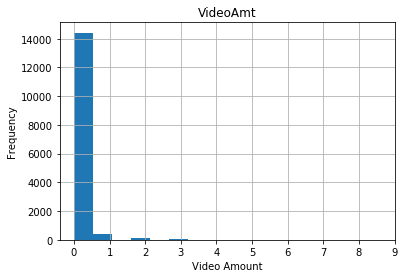

In [125]:
df.hist(column='VideoAmt', bins=15)
plt.xticks(range(0, 10))
plt.xlabel("Video Amount")
plt.ylabel("Frequency")

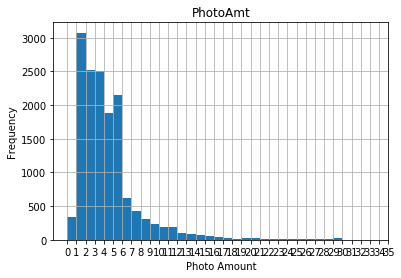

In [126]:
df.hist(column='PhotoAmt', bins=30)
plt.xticks(range(0, 36))
plt.xlabel("Photo Amount")
plt.ylabel("Frequency")